In [ ]:
#주석풀고 설치해주면 colab에서 geopandas가 돌아갑니다!

import requests
import zipfile


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

    
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/data.zip', 'data.zip')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/gz_2010_us_040_00_5m.json', 
          'gz_2010_us_040_00_5m.json')
save_file('https://courses.cs.washington.edu/courses/cse163/19sp/' +
          'files/lectures/05-13/stormhistory.csv', 'stormhistory.csv')

with zipfile.ZipFile("data.zip","r") as zip_ref:
    zip_ref.extractall()
    
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 10.9MB 15.6MB/s 
     |████████████████████████████████| 14.8MB 208kB/s 
     |████████████████████████████████| 225kB 2.7MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=c0beed2dc6e908c245027f88d6ab7c5cc1c57a6db867b7b7bf8b21bd971a42f5
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp
Requirement already up-to-date: shapely in /usr/local/lib/python3.6/dist-packages (1.7.1)
Requirement already up-to-date: descartes in /usr/local/lib/python3.6/dist-packages (1.1.0)


In [ ]:
import pathlib
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point
import descartes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/compas2020/data

/content/drive/My Drive/compas2020/data


In [ ]:
#file_path = 'gwangyang/data'
#p = pathlib.Path(file_path)

In [ ]:
개발행위제한구역= gpd.read_file('23.광양시_개발행위제한구역.geojson')
개발행위제한구역

,PRESENT_SN,DGM_NM,DGM_AR,DGM_LT,geometry
0,46230UQ171PS201202010010,개발행위허가제한지역,472951,2882,"MULTIPOLYGON (((127.75655 34.95331, 127.75639 ..."
1,46230UQ171PS201202010005,개발행위허가제한지역,285822,2693,"MULTIPOLYGON (((127.68861 34.93046, 127.68741 ..."
2,46230UQ171PS201202010012,개발행위허가제한지역,224847,3035,"MULTIPOLYGON (((127.66325 34.91089, 127.66325 ..."
3,46230UQ171PS201202010004,개발행위허가제한지역,1005133,6145,"MULTIPOLYGON (((127.62452 34.91111, 127.62508 ..."
4,46230UQ171PS201202010003,개발행위허가제한지역,428173,8369,"MULTIPOLYGON (((127.66049 34.91279, 127.66047 ..."
5,46230UQ171PS201202010002,개발행위허가제한지역,1751016,6324,"MULTIPOLYGON (((127.57814 34.93243, 127.59923 ..."
6,46230UQ171PS201202010011,개발행위허가제한지역,298061,3022,"MULTIPOLYGON (((127.67485 34.93474, 127.67484 ..."
7,46230UQ171PS201309010013,개발행위허가제한지역,2930431,6620,"MULTIPOLYGON (((127.63141 34.93677, 127.63141 ..."


In [ ]:
환경기초시설= gpd.read_file('28.광양시_도시계획(환경기초시설).geojson')
환경기초시설

,PRESENT_SN,DGM_NM,DGM_AR,DGM_LT,geometry
0,46230UQ158PS201202010007,하수종말처리시설,14403,558,"MULTIPOLYGON (((127.73116 34.95513, 127.73113 ..."
1,46230UQ158PS201202010008,하수종말처리시설,3712,243,"MULTIPOLYGON (((127.74574 34.96011, 127.74557 ..."
2,46230UQ158PS201202010009,폐수종말처리시설,21429,581,"MULTIPOLYGON (((127.76086 34.93416, 127.76070 ..."
3,46230UQ158PS201202010010,폐수종말처리시설,9816,413,"MULTIPOLYGON (((127.76746 34.94624, 127.76746 ..."
4,46230UQ158PS201202010003,분뇨처리시설,4716,282,"MULTIPOLYGON (((127.60798 34.93196, 127.60792 ..."
5,46230UQ158PS201202010004,기타 폐기물처리시설,1253423,4747,"MULTIPOLYGON (((127.65460 34.95111, 127.65271 ..."
6,46230UQ158PS201202010005,기타 폐기물처리시설,56119,995,"MULTIPOLYGON (((127.67543 34.96926, 127.67542 ..."
7,46230UQ158PS201202010006,하수종말처리시설,62644,1028,"MULTIPOLYGON (((127.69227 34.92799, 127.68882 ..."
8,46230UQ158PS201202010011,기타 폐기물처리시설,165300,3498,"MULTIPOLYGON (((127.78418 34.91192, 127.78410 ..."
9,46230UQ158PS201308010002,하수종말처리시설,44842,869,"MULTIPOLYGON (((127.58642 34.92640, 127.58655 ..."


In [ ]:
유통공급시설= gpd.read_file('27.광양시_도시계획(유통공급시설).geojson')
유통공급시설

,PRESENT_SN,DGM_NM,DGM_AR,DGM_LT,geometry
0,46230UQ154PS201202010093,고압선,613,99,"MULTIPOLYGON (((127.72901 34.95763, 127.72894 ..."
1,46230UQ154PS201202010094,고압선,1097,132,"MULTIPOLYGON (((127.73512 34.95831, 127.73495 ..."
2,46230UQ154PS201202010095,배수시설,3507,247,"MULTIPOLYGON (((127.71255 34.96631, 127.71337 ..."
3,46230UQ154PS201202010092,고압선,737,109,"MULTIPOLYGON (((127.72631 34.95749, 127.72660 ..."
4,46230UQ154PS201202010105,기타 전기공급설비,425,82,"MULTIPOLYGON (((127.63551 35.05054, 127.63532 ..."
...,...,...,...,...,...
116,46230UQ154PS201202010038,기타 전기공급설비,554,94,"MULTIPOLYGON (((127.64143 35.04760, 127.64119 ..."
117,46230UQ154PS201202010039,기타 전기공급설비,292,68,"MULTIPOLYGON (((127.64158 35.02814, 127.64141 ..."
118,46230UQ154PS201202010040,기타 전기공급설비,250,63,"MULTIPOLYGON (((127.64329 35.03213, 127.64313 ..."
119,46230UQ154PS201202010041,기타 전기공급설비,362,76,"MULTIPOLYGON (((127.64435 35.03451, 127.64415 ..."


In [ ]:
개발행위제한구역= gpd.read_file('23.광양시_개발행위제한구역.geojson')
개발행위제한구역

In [ ]:
#chargingStation = pd.read_csv(p.joinpath('01.광양시_충전기설치현황.csv'))
chargingStation = pd.read_csv('01.광양시_충전기설치현황.csv')
chargingStation

,충전소명,충전소위치,충전기 운영기관,급속/완속,충전기용량,이용대수,충전기타입,요금정보(원/kw),lon,lat
0,LF스퀘어 광양점,전남 광양시 광양읍 순광로 466 1층,환경부(한국자동차환경협회),급속,200KW 동시충전,2,DC콤보,255.70,127.568300,34.963002
1,광양만권경제자유구역청,전남 광양시 광양읍 인덕로 1100(광양시 제2청사),환경부(한국자동차환경협회),급속,50KW,1,DC차데모/AC3상/DC콤보,255.70,127.583323,34.980334
2,광양송보파인빌5차아파트,전남 광양시 진등길 55-5 (마동 송보파인빌류 아파트) 501동~506동 상가동,케이티,완속,7kw/h,5,AC완속,170.00,127.689013,34.953759
3,광양시 모리스모텔,전남 광양시 광영로 118-1 지상주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.716708,34.964032
4,광양시 백운쇼핑센타,전남 광양시 폭포사랑길 99 주차장,차지비,완속,7kw/h,2,AC완속,245.00,127.732440,34.940444
5,광양시 블루핸즈(광양정비센터),전남 광양시 광양읍 해광로 888 실외주차장,차지비,완속,7kw/h,1,AC완속,245.00,127.582443,34.963334
6,광양시 비치모텔,전남 광양시 진월면 백운1로 389 주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.750981,34.962506
7,광양시 포스코 ICT 광양사업소,전남 광양시 태인4길 20 주차장,차지비,완속,7kw/h,1,AC완속,250.00,127.760072,34.941198
8,광양시 프라자모텔,전남 광양시 광영로 34,차지비,완속,7kw/h,2,AC완속,250.00,127.725127,34.962147
9,광양시 광양읍사무소,전남 광양시 광양읍 남등길 6,한국전기차충전서비스,완속,7kw/h,1,AC완속,255.70,127.580612,34.973057


In [ ]:
chargingStation['lon'] = chargingStation['lon'].astype(float)
chargingStation['lat'] = chargingStation['lat'].astype(float)
chargingStation['geometry'] = chargingStation.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
chargingStation = gpd.GeoDataFrame(chargingStation, geometry='geometry')

chargingStation

,충전소명,충전소위치,충전기 운영기관,급속/완속,충전기용량,이용대수,충전기타입,요금정보(원/kw),lon,lat,geometry
0,LF스퀘어 광양점,전남 광양시 광양읍 순광로 466 1층,환경부(한국자동차환경협회),급속,200KW 동시충전,2,DC콤보,255.70,127.568300,34.963002,POINT (127.56830 34.96300)
1,광양만권경제자유구역청,전남 광양시 광양읍 인덕로 1100(광양시 제2청사),환경부(한국자동차환경협회),급속,50KW,1,DC차데모/AC3상/DC콤보,255.70,127.583323,34.980334,POINT (127.58332 34.98033)
2,광양송보파인빌5차아파트,전남 광양시 진등길 55-5 (마동 송보파인빌류 아파트) 501동~506동 상가동,케이티,완속,7kw/h,5,AC완속,170.00,127.689013,34.953759,POINT (127.68901 34.95376)
3,광양시 모리스모텔,전남 광양시 광영로 118-1 지상주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.716708,34.964032,POINT (127.71671 34.96403)
4,광양시 백운쇼핑센타,전남 광양시 폭포사랑길 99 주차장,차지비,완속,7kw/h,2,AC완속,245.00,127.732440,34.940444,POINT (127.73244 34.94044)
5,광양시 블루핸즈(광양정비센터),전남 광양시 광양읍 해광로 888 실외주차장,차지비,완속,7kw/h,1,AC완속,245.00,127.582443,34.963334,POINT (127.58244 34.96333)
6,광양시 비치모텔,전남 광양시 진월면 백운1로 389 주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.750981,34.962506,POINT (127.75098 34.96251)
7,광양시 포스코 ICT 광양사업소,전남 광양시 태인4길 20 주차장,차지비,완속,7kw/h,1,AC완속,250.00,127.760072,34.941198,POINT (127.76007 34.94120)
8,광양시 프라자모텔,전남 광양시 광영로 34,차지비,완속,7kw/h,2,AC완속,250.00,127.725127,34.962147,POINT (127.72513 34.96215)
9,광양시 광양읍사무소,전남 광양시 광양읍 남등길 6,한국전기차충전서비스,완속,7kw/h,1,AC완속,255.70,127.580612,34.973057,POINT (127.58061 34.97306)


In [ ]:
#parkingLot = pd.read_csv(p.joinpath('02.광양시_주차장_공간정보.csv'))

parkingLot = pd.read_csv('02.광양시_주차장_공간정보.csv')
parkingLot


,주차장명칭,구분,면적,주차면수,유료/무료,주소,lon,lat
0,인동숲앞 주차장,노외,4189.0,161.0,유료,인서리 237-1,127.586883,34.970324
1,구터미널주차장,노외,2968.0,125.0,유료,중동 1651,127.695428,34.936252
2,구경찰서 주차장,노외,2836.0,89.0,무료,읍내리 227-1,127.584586,34.975637
3,칠성1지구,노외,1980.0,52.0,무료,칠성리 962-1,127.580683,34.970130
4,칠성1지구,노외,1970.0,64.0,무료,칠성리 948-1,127.580707,34.972523
...,...,...,...,...,...,...,...,...
230,포석정위도로변,피서지,264.0,10.0,무료,동곡리 662-1,127.604822,35.079214
231,동곡산장옆,피서지,1212.0,60.0,무료,동곡리 549,127.613417,35.070673
232,하천첨주변,피서지,2381.0,96.0,무료,산남리 154-4,127.611774,35.002759
233,회계분교,피서지,2090.0,66.0,무료,진상 어치 1140,127.674719,35.092388


In [ ]:
parkingLot['lon'] = parkingLot['lon'].astype(float)
parkingLot['lat'] = parkingLot['lat'].astype(float)
parkingLot['geometry'] = parkingLot.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
parkingLot = gpd.GeoDataFrame(parkingLot, geometry='geometry')

parkingLot

,주차장명칭,구분,면적,주차면수,유료/무료,주소,lon,lat,geometry
0,인동숲앞 주차장,노외,4189.0,161.0,유료,인서리 237-1,127.586883,34.970324,POINT (127.58688 34.97032)
1,구터미널주차장,노외,2968.0,125.0,유료,중동 1651,127.695428,34.936252,POINT (127.69543 34.93625)
2,구경찰서 주차장,노외,2836.0,89.0,무료,읍내리 227-1,127.584586,34.975637,POINT (127.58459 34.97564)
3,칠성1지구,노외,1980.0,52.0,무료,칠성리 962-1,127.580683,34.970130,POINT (127.58068 34.97013)
4,칠성1지구,노외,1970.0,64.0,무료,칠성리 948-1,127.580707,34.972523,POINT (127.58071 34.97252)
...,...,...,...,...,...,...,...,...,...
230,포석정위도로변,피서지,264.0,10.0,무료,동곡리 662-1,127.604822,35.079214,POINT (127.60482 35.07921)
231,동곡산장옆,피서지,1212.0,60.0,무료,동곡리 549,127.613417,35.070673,POINT (127.61342 35.07067)
232,하천첨주변,피서지,2381.0,96.0,무료,산남리 154-4,127.611774,35.002759,POINT (127.61177 35.00276)
233,회계분교,피서지,2090.0,66.0,무료,진상 어치 1140,127.674719,35.092388,POINT (127.67472 35.09239)


In [ ]:
#campsite = pd.read_csv(p.joinpath('05.광양시_대중집합시설_야영장.csv'))

campsite = pd.read_csv('05.광양시_대중집합시설_야영장.csv')
campsite

,명칭,주소,소유주체(공공/민간),lon,lat
0,진틀펜션야영장,광양시 옥룡면 신재로 1678-54,민간,127.601787,35.096566
1,느랭이골자연휴양림,광양시 다압면 토끼재길 119-32,민간,127.710849,35.060546
2,백운산수련관야영장,광양시 옥룡면 약수제단길 154,민간,127.631555,35.069553
3,봉강하조오토캠핑장,광양시 봉강면 성불로 1097,민간,127.562487,35.076193
4,백운산자연휴양림,광양시 옥룡면 백계로 337,공공,127.591184,35.054216
5,백운제오토캠핑장,광양시 봉강면 봉당리 178,공공,127.581644,35.005226


In [ ]:
campsite['lon'] = campsite['lon'].astype(float)
campsite['lat'] = campsite['lat'].astype(float)
campsite['geometry'] = campsite.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
campsite = gpd.GeoDataFrame(campsite, geometry='geometry')
campsite

,명칭,주소,소유주체(공공/민간),lon,lat,geometry
0,진틀펜션야영장,광양시 옥룡면 신재로 1678-54,민간,127.601787,35.096566,POINT (127.60179 35.09657)
1,느랭이골자연휴양림,광양시 다압면 토끼재길 119-32,민간,127.710849,35.060546,POINT (127.71085 35.06055)
2,백운산수련관야영장,광양시 옥룡면 약수제단길 154,민간,127.631555,35.069553,POINT (127.63156 35.06955)
3,봉강하조오토캠핑장,광양시 봉강면 성불로 1097,민간,127.562487,35.076193,POINT (127.56249 35.07619)
4,백운산자연휴양림,광양시 옥룡면 백계로 337,공공,127.591184,35.054216,POINT (127.59118 35.05422)
5,백운제오토캠핑장,광양시 봉강면 봉당리 178,공공,127.581644,35.005226,POINT (127.58164 35.00523)


In [ ]:
#gyboundary = gpd.read_file(p.joinpath('20.광양시_행정경계(읍면동).geojson'))

gyboundary = gpd.read_file('20.광양시_행정경계(읍면동).geojson')
gyboundary

,ADM_DR_CD,ADM_DR_NM,geometry
0,3606031,봉강면,"MULTIPOLYGON (((127.58037 35.10902, 127.58052 ..."
1,3606032,옥룡면,"MULTIPOLYGON (((127.59872 35.12006, 127.59919 ..."
2,3606033,옥곡면,"MULTIPOLYGON (((127.64878 35.03547, 127.64902 ..."
3,3606034,진상면,"MULTIPOLYGON (((127.65639 35.11680, 127.65698 ..."
4,3606035,진월면,"MULTIPOLYGON (((127.75715 35.05502, 127.75716 ..."
5,3606036,다압면,"MULTIPOLYGON (((127.64117 35.16850, 127.64140 ..."
6,3606051,골약동,"MULTIPOLYGON (((127.68056 34.92848, 127.68105 ..."
7,3606053,중마동,"MULTIPOLYGON (((127.70376 34.96198, 127.70542 ..."
8,3606054,광영동,"MULTIPOLYGON (((127.71676 34.96939, 127.71691 ..."
9,3606055,태인동,"MULTIPOLYGON (((127.76162 34.95988, 127.76163 ..."


In [ ]:
print(gyboundary.crs)

epsg:4326


In [ ]:
chargingStation.crs = {'init':'epsg:4326'}
print(chargingStation.crs)

+init=epsg:4326 +type=crs


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
parkingLot.crs = {'init':'epsg:4326'}
print(parkingLot.crs)

{'init': 'epsg:4326'}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
campsite.crs = {'init':'epsg:4326'}
print(campsite.crs)

+init=epsg:4326 +type=crs


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


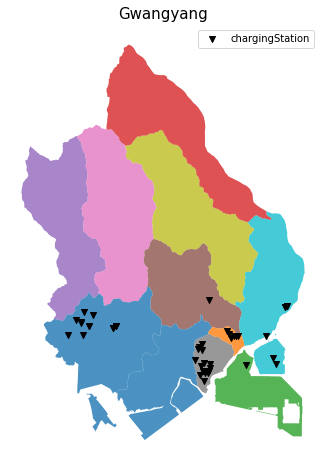

In [ ]:
#충전소

ax0 = gyboundary.plot(column="ADM_DR_NM", figsize=(8,8), alpha=0.8)
chargingStation.plot(ax=ax0, marker='v', color='black', label='chargingStation')
ax0.set_title("Gwangyang", fontsize=15)
ax0.set_axis_off()
plt.legend()
plt.show()

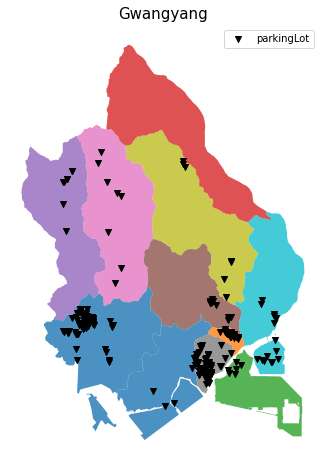

In [ ]:
#주차장 

ax1 = gyboundary.plot(column="ADM_DR_NM", figsize=(8,8), alpha=0.8)
parkingLot.plot(ax=ax1, marker='v', color='black', label='parkingLot')
ax1.set_title("Gwangyang", fontsize=15)
ax1.set_axis_off()
plt.legend()
plt.show()

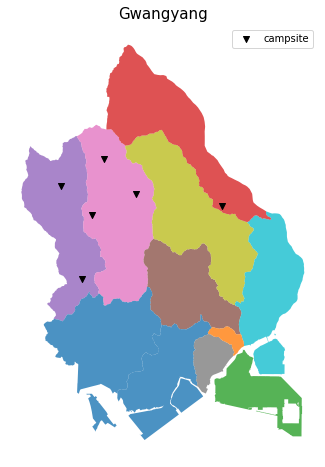

In [ ]:
#야영지

ax2 = gyboundary.plot(column="ADM_DR_NM", figsize=(8,8), alpha=0.8)
campsite.plot(ax=ax2, marker='v', color='black', label='campsite')
ax2.set_title("Gwangyang", fontsize=15)
ax2.set_axis_off()
plt.legend()
plt.show()

In [ ]:
chslist = []
for i in range(len(chargingStation.geometry)):
    for j in range(len(gyboundary.geometry)):
        if chargingStation.geometry[i].within(gyboundary.geometry[j]) == True:
            chslist.append(gyboundary.ADM_DR_NM[j])
            
pllist = []
for i in range(len(parkingLot.geometry)):
    for j in range(len(gyboundary.geometry)):
        if parkingLot.geometry[i].within(gyboundary.geometry[j]) == True:
            pllist.append(gyboundary.ADM_DR_NM[j])
            
cslist = []
for i in range(len(campsite.geometry)):
    for j in range(len(gyboundary.geometry)):
        if campsite.geometry[i].within(gyboundary.geometry[j]) == True:
            cslist.append(gyboundary.ADM_DR_NM[j])
            
#print(chslist)
#print(pllist)
#print(cslist)

In [ ]:
chargingStation['administration'] = chslist
chargingStation

,충전소명,충전소위치,충전기 운영기관,급속/완속,충전기용량,이용대수,충전기타입,요금정보(원/kw),lon,lat,geometry,administration
0,LF스퀘어 광양점,전남 광양시 광양읍 순광로 466 1층,환경부(한국자동차환경협회),급속,200KW 동시충전,2,DC콤보,255.70,127.568300,34.963002,POINT (127.56830 34.96300),광양읍
1,광양만권경제자유구역청,전남 광양시 광양읍 인덕로 1100(광양시 제2청사),환경부(한국자동차환경협회),급속,50KW,1,DC차데모/AC3상/DC콤보,255.70,127.583323,34.980334,POINT (127.58332 34.98033),광양읍
2,광양송보파인빌5차아파트,전남 광양시 진등길 55-5 (마동 송보파인빌류 아파트) 501동~506동 상가동,케이티,완속,7kw/h,5,AC완속,170.00,127.689013,34.953759,POINT (127.68901 34.95376),중마동
3,광양시 모리스모텔,전남 광양시 광영로 118-1 지상주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.716708,34.964032,POINT (127.71671 34.96403),광영동
4,광양시 백운쇼핑센타,전남 광양시 폭포사랑길 99 주차장,차지비,완속,7kw/h,2,AC완속,245.00,127.732440,34.940444,POINT (127.73244 34.94044),금호동
5,광양시 블루핸즈(광양정비센터),전남 광양시 광양읍 해광로 888 실외주차장,차지비,완속,7kw/h,1,AC완속,245.00,127.582443,34.963334,POINT (127.58244 34.96333),광양읍
6,광양시 비치모텔,전남 광양시 진월면 백운1로 389 주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.750981,34.962506,POINT (127.75098 34.96251),진월면
7,광양시 포스코 ICT 광양사업소,전남 광양시 태인4길 20 주차장,차지비,완속,7kw/h,1,AC완속,250.00,127.760072,34.941198,POINT (127.76007 34.94120),태인동
8,광양시 프라자모텔,전남 광양시 광영로 34,차지비,완속,7kw/h,2,AC완속,250.00,127.725127,34.962147,POINT (127.72513 34.96215),광영동
9,광양시 광양읍사무소,전남 광양시 광양읍 남등길 6,한국전기차충전서비스,완속,7kw/h,1,AC완속,255.70,127.580612,34.973057,POINT (127.58061 34.97306),광양읍


In [ ]:
import numpy as np
owner_list= np.array([owner_land.소유구분명[j] for i in range(len(chargingStation.geometry)) for j in range(len(owner_land.geometry)) if chargingStation.geometry[i].within(owner_land.geometry[j])==True])

owner_list

array(['법인', '군유지', None, None, '법인', '시, 도유지', None, '법인', None, '군유지',
       '군유지', '군유지', None, None, '법인', '군유지', None, None, None, '군유지',
       None, '법인', '법인', '법인', '법인', None, '군유지', '군유지', '군유지', '군유지',
       '법인', '법인', '군유지', None, None, None, None, None, None, None, None,
       None, None, None], dtype=object)

In [ ]:
owner_list.tolist()

['법인',
 '군유지',
 None,
 None,
 '법인',
 '시, 도유지',
 None,
 '법인',
 None,
 '군유지',
 '군유지',
 '군유지',
 None,
 None,
 '법인',
 '군유지',
 None,
 None,
 None,
 '군유지',
 None,
 '법인',
 '법인',
 '법인',
 '법인',
 None,
 '군유지',
 '군유지',
 '군유지',
 '군유지',
 '법인',
 '법인',
 '군유지',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
chargingStation['소유지구분명'] = owner_list
chargingStation

,충전소명,충전소위치,충전기 운영기관,급속/완속,충전기용량,이용대수,충전기타입,요금정보(원/kw),lon,lat,geometry,administration,소유지구분명
0,LF스퀘어 광양점,전남 광양시 광양읍 순광로 466 1층,환경부(한국자동차환경협회),급속,200KW 동시충전,2,DC콤보,255.70,127.568300,34.963002,POINT (127.56830 34.96300),광양읍,법인
1,광양만권경제자유구역청,전남 광양시 광양읍 인덕로 1100(광양시 제2청사),환경부(한국자동차환경협회),급속,50KW,1,DC차데모/AC3상/DC콤보,255.70,127.583323,34.980334,POINT (127.58332 34.98033),광양읍,군유지
2,광양송보파인빌5차아파트,전남 광양시 진등길 55-5 (마동 송보파인빌류 아파트) 501동~506동 상가동,케이티,완속,7kw/h,5,AC완속,170.00,127.689013,34.953759,POINT (127.68901 34.95376),중마동,None
3,광양시 모리스모텔,전남 광양시 광영로 118-1 지상주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.716708,34.964032,POINT (127.71671 34.96403),광영동,None
4,광양시 백운쇼핑센타,전남 광양시 폭포사랑길 99 주차장,차지비,완속,7kw/h,2,AC완속,245.00,127.732440,34.940444,POINT (127.73244 34.94044),금호동,법인
5,광양시 블루핸즈(광양정비센터),전남 광양시 광양읍 해광로 888 실외주차장,차지비,완속,7kw/h,1,AC완속,245.00,127.582443,34.963334,POINT (127.58244 34.96333),광양읍,"시, 도유지"
6,광양시 비치모텔,전남 광양시 진월면 백운1로 389 주차장,차지비,완속,7kw/h,2,AC완속,250.00,127.750981,34.962506,POINT (127.75098 34.96251),진월면,None
7,광양시 포스코 ICT 광양사업소,전남 광양시 태인4길 20 주차장,차지비,완속,7kw/h,1,AC완속,250.00,127.760072,34.941198,POINT (127.76007 34.94120),태인동,법인
8,광양시 프라자모텔,전남 광양시 광영로 34,차지비,완속,7kw/h,2,AC완속,250.00,127.725127,34.962147,POINT (127.72513 34.96215),광영동,None
9,광양시 광양읍사무소,전남 광양시 광양읍 남등길 6,한국전기차충전서비스,완속,7kw/h,1,AC완속,255.70,127.580612,34.973057,POINT (127.58061 34.97306),광양읍,군유지


In [ ]:
chargingStation.to_csv('chargingStation.csv', index=False, encoding='cp949')  #csv 파일저장

In [ ]:
parkingLot['administration'] = pllist
parkingLot

,주차장명칭,구분,면적,주차면수,유료/무료,주소,lon,lat,geometry,administration
0,인동숲앞 주차장,노외,4189.0,161.0,유료,인서리 237-1,127.586883,34.970324,POINT (127.58688 34.97032),광양읍
1,구터미널주차장,노외,2968.0,125.0,유료,중동 1651,127.695428,34.936252,POINT (127.69543 34.93625),중마동
2,구경찰서 주차장,노외,2836.0,89.0,무료,읍내리 227-1,127.584586,34.975637,POINT (127.58459 34.97564),광양읍
3,칠성1지구,노외,1980.0,52.0,무료,칠성리 962-1,127.580683,34.970130,POINT (127.58068 34.97013),광양읍
4,칠성1지구,노외,1970.0,64.0,무료,칠성리 948-1,127.580707,34.972523,POINT (127.58071 34.97252),광양읍
...,...,...,...,...,...,...,...,...,...,...
230,포석정위도로변,피서지,264.0,10.0,무료,동곡리 662-1,127.604822,35.079214,POINT (127.60482 35.07921),옥룡면
231,동곡산장옆,피서지,1212.0,60.0,무료,동곡리 549,127.613417,35.070673,POINT (127.61342 35.07067),옥룡면
232,하천첨주변,피서지,2381.0,96.0,무료,산남리 154-4,127.611774,35.002759,POINT (127.61177 35.00276),옥룡면
233,회계분교,피서지,2090.0,66.0,무료,진상 어치 1140,127.674719,35.092388,POINT (127.67472 35.09239),진상면


In [ ]:
campsite['administration'] = cslist
campsite

,명칭,주소,소유주체(공공/민간),lon,lat,geometry,administration
0,진틀펜션야영장,광양시 옥룡면 신재로 1678-54,민간,127.601787,35.096566,POINT (127.60179 35.09657),옥룡면
1,느랭이골자연휴양림,광양시 다압면 토끼재길 119-32,민간,127.710849,35.060546,POINT (127.71085 35.06055),다압면
2,백운산수련관야영장,광양시 옥룡면 약수제단길 154,민간,127.631555,35.069553,POINT (127.63156 35.06955),옥룡면
3,봉강하조오토캠핑장,광양시 봉강면 성불로 1097,민간,127.562487,35.076193,POINT (127.56249 35.07619),봉강면
4,백운산자연휴양림,광양시 옥룡면 백계로 337,공공,127.591184,35.054216,POINT (127.59118 35.05422),옥룡면
5,백운제오토캠핑장,광양시 봉강면 봉당리 178,공공,127.581644,35.005226,POINT (127.58164 35.00523),봉강면




---



#소유자 구분 추가

In [ ]:
owner_land = gpd.read_file('14.광양시_소유지정보.geojson')
owner_land

,고유번호,법정동코드,법정동명,지번,소유구분코드,소유구분명,국가기관구분코드,국가기관구분,지목코드,지목,토지면적,geometry
0,4623010200201000100,4623010200,전라남도 광양시 황길동,100-100,None,None,None,None,None,None,0.0,"MULTIPOLYGON (((127.64563 34.92095, 127.64558 ..."
1,4623032024103610006,4623032024,전라남도 광양시 옥룡면 동곡리,361-6,None,None,None,None,None,None,0.0,"MULTIPOLYGON (((127.61621 35.09185, 127.61632 ..."
2,4623032024201080000,4623032024,전라남도 광양시 옥룡면 동곡리,108,None,None,None,None,05,임야,240113.0,"MULTIPOLYGON (((127.61412 35.08394, 127.61406 ..."
3,4623033022105110000,4623033022,전라남도 광양시 옥곡면 대죽리,511,01,개인,ZZ,구분없음,02,답,747.0,"MULTIPOLYGON (((127.67042 34.99886, 127.67048 ..."
4,4623033022105110001,4623033022,전라남도 광양시 옥곡면 대죽리,511-1,None,None,None,None,None,None,0.0,"MULTIPOLYGON (((127.67111 34.99869, 127.67126 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
198162,4623034023201970004,4623034023,전라남도 광양시 진상면 비평리,197-4,01,개인,ZZ,구분없음,05,임야,13637.0,"MULTIPOLYGON (((127.70324 35.04567, 127.70231 ..."
198163,4623034023201970011,4623034023,전라남도 광양시 진상면 비평리,197-11,None,None,None,None,None,None,0.0,"MULTIPOLYGON (((127.70405 35.04689, 127.70428 ..."
198164,4623034023201970006,4623034023,전라남도 광양시 진상면 비평리,197-6,01,개인,ZZ,구분없음,05,임야,45093.0,"MULTIPOLYGON (((127.70198 35.04717, 127.70218 ..."
198165,4623034023201970009,4623034023,전라남도 광양시 진상면 비평리,197-9,None,None,None,None,None,None,0.0,"MULTIPOLYGON (((127.70216 35.04498, 127.70209 ..."


In [ ]:
owner_land['소유구분명'].unique()

array([None, '개인', '군유지', '시, 도유지', '법인', '종중', '국유지', '종교단체', '기타단체',
       '일본인, 창씨명등', '외국인, 외국공공기관'], dtype=object)

In [ ]:
owner_land.crs = {'init':'epsg:4326'}
print(owner_land.crs)

+init=epsg:4326 +type=crs


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


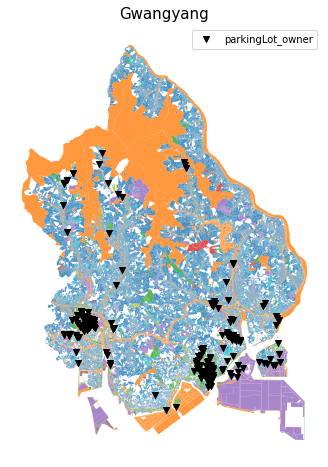

In [ ]:
_ax = owner_land.plot(column="소유구분명", figsize=(8,8), alpha=0.8)
parkingLot.plot(ax=_ax, marker='v', color='black', label='parkingLot_owner')
_ax.set_title("Gwangyang", fontsize=15)
_ax.set_axis_off()
plt.legend()
plt.show()

In [ ]:
import numpy as np
owner_list= np.array([owner_land.소유구분명[j] for i in range(len(parkingLot.geometry)) for j in range(len(owner_land.geometry)) if parkingLot.geometry[i].within(owner_land.geometry[j])==True])

owner_list

array(['군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', None, '군유지',
       '군유지', None, '개인', None, '군유지', '군유지', '개인', '군유지', '군유지', '군유지',
       '군유지', '군유지', None, '군유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', '군유지', '국유지', '국유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', None, '군유지', '군유지', '군유지', '시, 도유지', '군유지', '군유지', None,
       '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지', '군유지',
       '군유지', '군유지', '군유지', '군유지', None, '법인', '법인', '법인', None, None,
       '군유지', '개인

In [ ]:
owner_list.tolist()

In [ ]:
#02.광양시_주차장_공간정보 소유자 구분 추가 완료

parkingLot['소유지구분명'] = owner_list
parkingLot

,주차장명칭,구분,면적,주차면수,유료/무료,주소,lon,lat,geometry,administration,소유지구분명
0,인동숲앞 주차장,노외,4189.0,161.0,유료,인서리 237-1,127.586883,34.970324,POINT (127.58688 34.97032),광양읍,군유지
1,구터미널주차장,노외,2968.0,125.0,유료,중동 1651,127.695428,34.936252,POINT (127.69543 34.93625),중마동,군유지
2,구경찰서 주차장,노외,2836.0,89.0,무료,읍내리 227-1,127.584586,34.975637,POINT (127.58459 34.97564),광양읍,군유지
3,칠성1지구,노외,1980.0,52.0,무료,칠성리 962-1,127.580683,34.970130,POINT (127.58068 34.97013),광양읍,군유지
4,칠성1지구,노외,1970.0,64.0,무료,칠성리 948-1,127.580707,34.972523,POINT (127.58071 34.97252),광양읍,군유지
...,...,...,...,...,...,...,...,...,...,...,...
230,포석정위도로변,피서지,264.0,10.0,무료,동곡리 662-1,127.604822,35.079214,POINT (127.60482 35.07921),옥룡면,군유지
231,동곡산장옆,피서지,1212.0,60.0,무료,동곡리 549,127.613417,35.070673,POINT (127.61342 35.07067),옥룡면,군유지
232,하천첨주변,피서지,2381.0,96.0,무료,산남리 154-4,127.611774,35.002759,POINT (127.61177 35.00276),옥룡면,개인
233,회계분교,피서지,2090.0,66.0,무료,진상 어치 1140,127.674719,35.092388,POINT (127.67472 35.09239),진상면,군유지


In [ ]:
parkingLot.to_csv('parkinglot.csv', index=False, encoding='cp949')  #csv 파일저장

In [ ]:
traffic_facility = gpd.read_file('26.광양시_도시계획(교통시설).geojson')

traffic_facility_parkingLot = traffic_facility[traffic_facility['DGM_NM'].str.contains('주차')]  #교통시설 중 '주차'가 들어간 것만 추출
traffic_facility_parkingLot.rename(columns={"DGM_AR":"area"}, inplace=True)  #면적 의미하는 DGM_AR변수명을 area로 변경
traffic_facility_parkingLot['center_x']=traffic_facility_parkingLot['geometry'].centroid.x  #multipoligon형태여서 중심값 추출
traffic_facility_parkingLot['center_y']=traffic_facility_parkingLot['geometry'].centroid.y
traffic_facility_parkingLot['geometry'] = traffic_facility_parkingLot.apply(lambda row : Point([row['center_x'], row['center_y']]), axis=1)
traffic_facility_parkingLot.drop(['center_x','center_y', 'PRESENT_SN','DGM_LT','DGM_NM'], axis=1, inplace=True)  #필요없는 열들 제거

traffic_facility_parkingLot.reset_index(drop=True, inplace=True)
traffic_facility_parkingLot

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """
/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/local/lib/python

,area,geometry
0,344,POINT (127.58425 34.97704)
1,483,POINT (127.58390 34.97837)
2,1612,POINT (127.75138 34.94576)
3,305,POINT (127.70270 34.98894)
4,4608,POINT (127.68964 34.93745)
...,...,...
203,805,POINT (127.58994 34.97387)
204,1244,POINT (127.66659 34.93274)
205,2657,POINT (127.58461 34.97563)
206,1313,POINT (127.69850 34.92671)


In [ ]:
traffic_facility_parkingLot = traffic_facility_parkingLot.drop([traffic_facility_parkingLot.index[153],traffic_facility_parkingLot.index[154],
                                                               traffic_facility_parkingLot.index[155],traffic_facility_parkingLot.index[156]])
traffic_facility_parkingLot.reset_index(drop=True,inplace=True)
traffic_facility_parkingLot

,area,geometry
0,344,POINT (127.58425 34.97704)
1,483,POINT (127.58390 34.97837)
2,1612,POINT (127.75138 34.94576)
3,305,POINT (127.70270 34.98894)
4,4608,POINT (127.68964 34.93745)
...,...,...
199,805,POINT (127.58994 34.97387)
200,1244,POINT (127.66659 34.93274)
201,2657,POINT (127.58461 34.97563)
202,1313,POINT (127.69850 34.92671)


In [ ]:
tlist = []
for i in range(len(traffic_facility_parkingLot)):
    for j in range(len(gyboundary)):
        if traffic_facility_parkingLot.geometry[i].within(gyboundary.geometry[j]) == True:
            tlist.append(gyboundary.ADM_DR_NM[j])
        

traffic_facility_parkingLot['administration'] = tlist
traffic_facility_parkingLot

,area,geometry,administration
0,344,POINT (127.58425 34.97704),광양읍
1,483,POINT (127.58390 34.97837),광양읍
2,1612,POINT (127.75138 34.94576),태인동
3,305,POINT (127.70270 34.98894),옥곡면
4,4608,POINT (127.68964 34.93745),중마동
...,...,...,...
199,805,POINT (127.58994 34.97387),광양읍
200,1244,POINT (127.66659 34.93274),골약동
201,2657,POINT (127.58461 34.97563),광양읍
202,1313,POINT (127.69850 34.92671),중마동


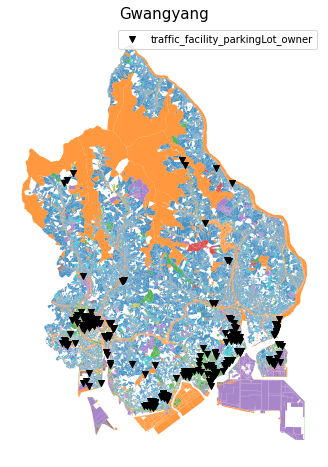

In [ ]:
_ax1 = owner_land.plot(column="소유구분명", figsize=(8,8), alpha=0.8)
traffic_facility_parkingLot.plot(ax=_ax1, marker='v', color='black', label='traffic_facility_parkingLot_owner')
_ax1.set_title("Gwangyang", fontsize=15)
_ax1.set_axis_off()
plt.legend()
plt.show()

In [ ]:
owner_list = []
exception_list=[]
count=0
for i in range(len(traffic_facility_parkingLot.geometry)):
    for j in range(len(owner_land.geometry)):
        if traffic_facility_parkingLot.geometry[i].within(owner_land.geometry[j]) == True:
            owner_list.append(owner_land.소유구분명[j])
            exception_list.append(i)
            count+=1
            print(count)

In [ ]:
print(exception_list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203]


In [ ]:
import numpy as np
owner_list= np.array([owner_land.토지면적[j]  for i in range(len(campsite.geometry)) for j in range(len(owner_land.geometry)) if campsite.geometry[i].within(owner_land.geometry[j])==True ])

owner_list

array([5.970000e+02, 5.223600e+04, 4.258210e+05, 6.500000e+02,
       3.293527e+06, 2.250200e+04])

In [ ]:
campsite['토지면적'] = owner_list
campsite

,명칭,주소,소유주체(공공/민간),lon,lat,geometry,administration,토지면적
0,진틀펜션야영장,광양시 옥룡면 신재로 1678-54,민간,127.601787,35.096566,POINT (127.60179 35.09657),옥룡면,597.0
1,느랭이골자연휴양림,광양시 다압면 토끼재길 119-32,민간,127.710849,35.060546,POINT (127.71085 35.06055),다압면,52236.0
2,백운산수련관야영장,광양시 옥룡면 약수제단길 154,민간,127.631555,35.069553,POINT (127.63156 35.06955),옥룡면,425821.0
3,봉강하조오토캠핑장,광양시 봉강면 성불로 1097,민간,127.562487,35.076193,POINT (127.56249 35.07619),봉강면,650.0
4,백운산자연휴양림,광양시 옥룡면 백계로 337,공공,127.591184,35.054216,POINT (127.59118 35.05422),옥룡면,3293527.0
5,백운제오토캠핑장,광양시 봉강면 봉당리 178,공공,127.581644,35.005226,POINT (127.58164 35.00523),봉강면,22502.0


In [ ]:
campsite.to_csv('campsite.csv', index=False, encoding='cp949')  #csv파일저장

In [ ]:
#40, 41번 index가 소유지 정보에 아예 존재하지 않음
owner_list.insert(40, None)
owner_list.insert(41, None)

In [ ]:
# 26.광양시_도시계획(교통시설) 소유자구분 추가 완료

traffic_facility_parkingLot['소유지구분명'] = owner_list
traffic_facility_parkingLot

,area,geometry,administration,소유지구분명
0,344,POINT (127.58425 34.97704),광양읍,군유지
1,483,POINT (127.58390 34.97837),광양읍,군유지
2,1612,POINT (127.75138 34.94576),태인동,None
3,305,POINT (127.70270 34.98894),옥곡면,군유지
4,4608,POINT (127.68964 34.93745),중마동,군유지
...,...,...,...,...
199,805,POINT (127.58994 34.97387),광양읍,개인
200,1244,POINT (127.66659 34.93274),골약동,None
201,2657,POINT (127.58461 34.97563),광양읍,군유지
202,1313,POINT (127.69850 34.92671),중마동,군유지


In [ ]:
traffic_facility_parkingLot.to_csv('traffic_facility_parkingLot.csv', index=False, encoding='cp949')  #csv파일저장

In [ ]:
lifePys = pd.read_csv('04.광양시_대중집합시설_생활체육시설.csv')
lifePys['category'] = '생활체육시설'
lifePys.rename(columns={"주소":"administration"}, inplace=True)
lifePys['lon'] = lifePys['lon'].astype(float)
lifePys['lat'] = lifePys['lat'].astype(float)
lifePys['geometry'] = lifePys.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
lifePys = gpd.GeoDataFrame(lifePys, geometry='geometry')
lifePys = lifePys[['category','geometry', 'administration']]
lifePys

,category,geometry,administration
0,생활체육시설,POINT (127.69528 34.93667),"전라남도 광양시 광장로 142, 5~6층 (중동)"
1,생활체육시설,POINT (127.69637 34.93624),"전라남도 광양시 오류2길 2, 3층 (중동)"
2,생활체육시설,POINT (127.71619 34.97707),전라남도 광양시 옥곡면 신금산단5길 41
3,생활체육시설,POINT (127.68899 34.95038),"광양시 진등1길 3-8, 1층 (중동)"
4,생활체육시설,POINT (127.69077 34.94922),광양시 진등길 6 (중동)
...,...,...,...
182,생활체육시설,POINT (127.60987 34.97349),"광양시 용강1길 11, 창덕아파트 1차상가 3층"
183,생활체육시설,POINT (127.73211 34.94020),"광양시 폭포사랑길 99, 백운쇼핑센터 1층 (금호동)"
184,생활체육시설,POINT (127.60994 34.97126),"전라남도 광양시 광양읍 와룡길 9-6, 1층"
185,생활체육시설,POINT (127.58740 34.97449),"전라남도 광양시 광양읍 희양현로 40, 광주은행 3층"


In [ ]:
lifePys = lifePys.drop([lifePys.index[148]])
lifePys.reset_index(drop=True,inplace=True)
lifePys

,category,geometry,administration
0,생활체육시설,POINT (127.69528 34.93667),"전라남도 광양시 광장로 142, 5~6층 (중동)"
1,생활체육시설,POINT (127.69637 34.93624),"전라남도 광양시 오류2길 2, 3층 (중동)"
2,생활체육시설,POINT (127.71619 34.97707),전라남도 광양시 옥곡면 신금산단5길 41
3,생활체육시설,POINT (127.68899 34.95038),"광양시 진등1길 3-8, 1층 (중동)"
4,생활체육시설,POINT (127.69077 34.94922),광양시 진등길 6 (중동)
...,...,...,...
181,생활체육시설,POINT (127.60987 34.97349),"광양시 용강1길 11, 창덕아파트 1차상가 3층"
182,생활체육시설,POINT (127.73211 34.94020),"광양시 폭포사랑길 99, 백운쇼핑센터 1층 (금호동)"
183,생활체육시설,POINT (127.60994 34.97126),"전라남도 광양시 광양읍 와룡길 9-6, 1층"
184,생활체육시설,POINT (127.58740 34.97449),"전라남도 광양시 광양읍 희양현로 40, 광주은행 3층"


In [ ]:
tlist = []
for i in range(len(lifePys)):
    for j in range(len(gyboundary)):
        if lifePys.geometry[i].within(gyboundary.geometry[j]) == True:
            tlist.append(gyboundary.ADM_DR_NM[j])

lifePys['administration'] = tlist
lifePys

,category,geometry,administration
0,생활체육시설,POINT (127.69528 34.93667),중마동
1,생활체육시설,POINT (127.69637 34.93624),중마동
2,생활체육시설,POINT (127.71619 34.97707),옥곡면
3,생활체육시설,POINT (127.68899 34.95038),중마동
4,생활체육시설,POINT (127.69077 34.94922),중마동
...,...,...,...
181,생활체육시설,POINT (127.60987 34.97349),광양읍
182,생활체육시설,POINT (127.73211 34.94020),금호동
183,생활체육시설,POINT (127.60994 34.97126),광양읍
184,생활체육시설,POINT (127.58740 34.97449),광양읍


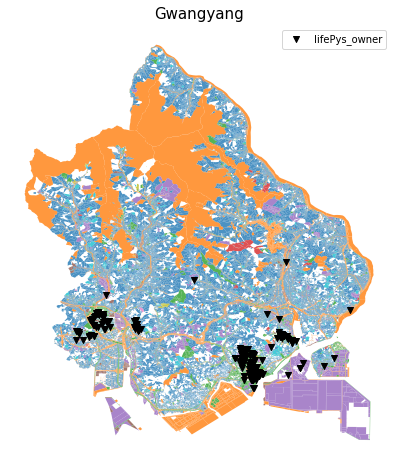

In [ ]:
_ax2 = owner_land.plot(column="소유구분명", figsize=(8,8), alpha=0.8)
lifePys.plot(ax=_ax2, marker='v', color='black', label='lifePys_owner')
_ax2.set_title("Gwangyang", fontsize=15)
_ax2.set_axis_off()
plt.legend()
plt.show()

In [ ]:
import numpy as np
owner_list= np.array([owner_land.소유구분명[j] for i in range(len(lifePys.geometry)) for j in range(len(owner_land.geometry)) if lifePys.geometry[i].within(owner_land.geometry[j])==True ])

owner_list

array(['개인', '개인', '개인', '개인', '개인', '개인', None, '개인', '법인', None, None,
       '개인', '개인', '법인', '법인', '개인', None, '개인', '개인', '개인', '개인', None,
       None, '개인', '개인', '개인', '개인', '개인', '법인', '개인', '개인', '개인', '개인',
       '법인', '법인', '법인', '개인', None, '법인', '개인', None, '개인', '법인', '개인',
       '개인', '개인', '개인', None, None, '개인', '개인', '개인', '개인', '개인', '개인',
       None, '개인', '개인', None, None, '개인', '개인', '개인', '개인', '개인', None,
       '개인', '개인', '개인', '개인', None, '개인', None, '개인', None, '개인', '개인',
       None, '개인', '개인', '개인', None, '개인', '개인', '개인', '개인', '개인', None,
       '개인', '개인', '개인', '개인', '개인', '개인', None, None, None, '개인', '개인',
       '개인', None, '개인', '개인', None, '개인', '개인', '법인', '법인', '개인', None,
       '군유지', '개인', '개인', '개인', '개인', '개인', '개인', '군유지', '개인', '개인', '법인',
       '법인', '개인', None, None, None, '개인', '법인', '개인', '개인', '개인', None,
       '개인', None, '개인', None, '개인', '법인', '개인', '개인', '개인', '개인', '개인',
       '법인', '법인', '법인', '법인', None, '개인', '개인', 

In [ ]:
owner_list.tolist()

['개인',
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 None,
 '개인',
 '법인',
 None,
 None,
 '개인',
 '개인',
 '법인',
 '법인',
 '개인',
 None,
 '개인',
 '개인',
 '개인',
 '개인',
 None,
 None,
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 '법인',
 '개인',
 '개인',
 '개인',
 '개인',
 '법인',
 '법인',
 '법인',
 '개인',
 None,
 '법인',
 '개인',
 None,
 '개인',
 '법인',
 '개인',
 '개인',
 '개인',
 '개인',
 None,
 None,
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 None,
 '개인',
 '개인',
 None,
 None,
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 None,
 '개인',
 '개인',
 '개인',
 '개인',
 None,
 '개인',
 None,
 '개인',
 None,
 '개인',
 '개인',
 None,
 '개인',
 '개인',
 '개인',
 None,
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 None,
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 None,
 None,
 None,
 '개인',
 '개인',
 '개인',
 None,
 '개인',
 '개인',
 None,
 '개인',
 '개인',
 '법인',
 '법인',
 '개인',
 None,
 '군유지',
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 '개인',
 '군유지',
 '개인',
 '개인',
 '법인',
 '법인',
 '개인',
 None,
 None,
 None,
 '개인',
 '법인',
 '개인',
 '개인',
 '개인',
 None,
 '개인',
 None,
 '개인',
 None,
 '개인',
 '법인',
 '개인',
 '개인',
 '개인',
 '개인',
 '개인

In [ ]:
# 04.광양시_대중집합시설_생활체육시설 소유자구분 추가 완료
lifePys['소유지구분명'] = owner_list
lifePys

,category,geometry,administration,소유지구분명
0,생활체육시설,POINT (127.69528 34.93667),중마동,개인
1,생활체육시설,POINT (127.69637 34.93624),중마동,개인
2,생활체육시설,POINT (127.71619 34.97707),옥곡면,개인
3,생활체육시설,POINT (127.68899 34.95038),중마동,개인
4,생활체육시설,POINT (127.69077 34.94922),중마동,개인
...,...,...,...,...
181,생활체육시설,POINT (127.60987 34.97349),광양읍,None
182,생활체육시설,POINT (127.73211 34.94020),금호동,법인
183,생활체육시설,POINT (127.60994 34.97126),광양읍,None
184,생활체육시설,POINT (127.58740 34.97449),광양읍,군유지


In [ ]:
import numpy as np
owner_list= np.array([owner_land.토지면적[j] for i in range(len(lifePys.geometry)) for j in range(len(owner_land.geometry)) if lifePys.geometry[i].within(owner_land.geometry[j])==True ])

owner_list

array([2.758000e+02, 5.436000e+02, 1.200100e+03, 3.957000e+02,
       2.332000e+02, 1.650100e+03, 1.654290e+03, 3.899000e+02,
       1.979000e+03, 5.573400e+02, 4.113200e+02, 2.598000e+02,
       7.180000e+02, 9.506000e+03, 2.487400e+03, 2.108000e+02,
       2.433000e+02, 4.525000e+02, 6.413000e+02, 8.618000e+03,
       2.494000e+02, 4.638000e+02, 3.884000e+02, 4.200000e+02,
       4.200000e+02, 4.462000e+02, 3.889000e+02, 3.890000e+02,
       1.593328e+05, 1.004600e+04, 8.485000e+02, 4.864000e+02,
       3.779000e+02, 1.190000e+03, 1.300700e+04, 1.300700e+04,
       1.244000e+03, 2.989000e+03, 9.506000e+03, 1.993000e+02,
       2.516000e+02, 3.957000e+02, 5.477300e+03, 3.527000e+02,
       2.515000e+02, 2.725000e+02, 2.147000e+02, 4.302000e+02,
       2.600000e+02, 4.530000e+02, 2.237000e+02, 2.270000e+02,
       2.686000e+02, 2.689000e+02, 1.952000e+02, 2.210000e+02,
       2.172000e+02, 3.800000e+02, 1.539200e+02, 2.757000e+02,
       1.886000e+02, 2.131000e+02, 2.284000e+02, 2.3160

In [ ]:
owner_list.tolist()

[275.8,
 543.6,
 1200.1,
 395.7,
 233.2,
 1650.1,
 1654.29,
 389.9,
 1979.0,
 557.34,
 411.32,
 259.8,
 718.0,
 9506.0,
 2487.4,
 210.8,
 243.3,
 452.5,
 641.3,
 8618.0,
 249.4,
 463.8,
 388.4,
 420.0,
 420.0,
 446.2,
 388.9,
 389.0,
 159332.8,
 10046.0,
 848.5,
 486.4,
 377.9,
 1190.0,
 13007.0,
 13007.0,
 1244.0,
 2989.0,
 9506.0,
 199.3,
 251.6,
 395.7,
 5477.3,
 352.7,
 251.5,
 272.5,
 214.7,
 430.2,
 260.0,
 453.0,
 223.7,
 227.0,
 268.6,
 268.9,
 195.2,
 221.0,
 217.2,
 380.0,
 153.92,
 275.7,
 188.6,
 213.1,
 228.4,
 231.6,
 287.8,
 702.7,
 162.9,
 273.4,
 267.6,
 543.9,
 259.0,
 224.1,
 424.29,
 970.0,
 370.9,
 543.6,
 225.7,
 549.4,
 513.2,
 370.2,
 286.1,
 274.5,
 262.2,
 285.0,
 371.7,
 348.8,
 271.0,
 250.0,
 723.1,
 350.8,
 277.8,
 393.6,
 308.6,
 417.0,
 1094.01,
 383.9,
 558.0,
 330.6,
 496.7,
 323.1,
 1038.22,
 203.1,
 125.0,
 940.5,
 645.9,
 600.5,
 13223.0,
 35732.1,
 491.0,
 500.0,
 22706.6,
 335.2,
 272.3,
 614.7,
 161.8,
 265.0,
 2634.0,
 26121.0,
 543.6,
 275.8,
 

In [ ]:
# 04.광양시_대중집합시설_생활체육시설 소유자구분 추가 완료
lifePys['토지면적'] = owner_list
lifePys

,category,geometry,administration,소유지구분명,토지면적
0,생활체육시설,POINT (127.69528 34.93667),중마동,개인,275.80
1,생활체육시설,POINT (127.69637 34.93624),중마동,개인,543.60
2,생활체육시설,POINT (127.71619 34.97707),옥곡면,개인,1200.10
3,생활체육시설,POINT (127.68899 34.95038),중마동,개인,395.70
4,생활체육시설,POINT (127.69077 34.94922),중마동,개인,233.20
...,...,...,...,...,...
181,생활체육시설,POINT (127.60987 34.97349),광양읍,None,60098.76
182,생활체육시설,POINT (127.73211 34.94020),금호동,법인,35732.10
183,생활체육시설,POINT (127.60994 34.97126),광양읍,None,657.90
184,생활체육시설,POINT (127.58740 34.97449),광양읍,군유지,285.00


In [ ]:
lifePys.to_csv('lifePys.csv', index=False, encoding='cp949') #csv파일저장